In [ ]:
# Data Set loading and Exploration

In [6]:

import pandas as pd

# Load dataset 
data = "https://raw.githubusercontent.com/PRIYANKAMUTHU20/Food-Classification-Using-Nutritional-Data/main/food_nutrition.csv"
df = pd.read_csv(data)

# Basic overview
print(df.shape)
df.head()


(31700, 16)


,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


Food_Name
Pizza        6000
Burger       5000
Donut        4500
Pasta        4000
Sushi        3500
Ice Cream    3000
Steak        2000
Apple        1500
Banana       1200
Salad        1000
Name: count, dtype: int64


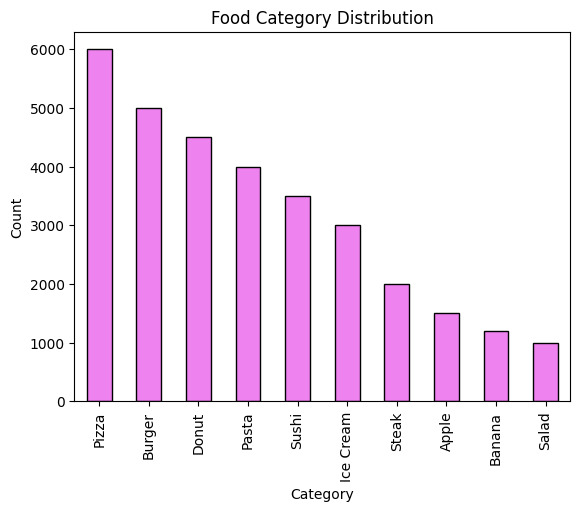

In [7]:
# Check target distribution
print(df['Food_Name'].value_counts())

# Visualize class distribution
import matplotlib.pyplot as plt

df['Food_Name'].value_counts().plot(kind='bar', color='violet', edgecolor='black')
plt.title("Food Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


In [8]:
# Dataset size
print(f"Total Records: {len(df)}")

# Missing values
print(df.isnull().sum())

# Check for duplicates
print(f"Duplicate Rows: {df.duplicated().sum()}")


Total Records: 31700
Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64
Duplicate Rows: 313


In [ ]:
# Data Pre-processing

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = ['Food_Name', 'Preparation_Method', 'Meal_Type', 'Is_Vegan', 'Is_Gluten_Free']


# STEP 1: Remove duplicates

df = df.drop_duplicates()
print(" Duplicates removed:", df.duplicated().sum())


# STEP 2: Impute missing values (grouped)

def impute_missing(group):
    for col in numeric_cols:
        if group[col].isna().any():
            group[col] = group[col].fillna(group[col].median())  # group median
    return group

df = (
    df.groupby(categorical_cols, group_keys=False)
      .apply(impute_missing)
)

# If any still remain missing → global median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# STEP 3: Detect and cap outliers (grouped)

def cap_outliers(group):
    for col in numeric_cols:
        q1 = group[col].quantile(0.25)
        q3 = group[col].quantile(0.75)
        iqr = q3 - q1
        lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
        group[col] = np.clip(group[col], lower, upper)
    return group

df = (
    df.groupby(categorical_cols, group_keys=False)
      .apply(cap_outliers)
)


# STEP 4: Normalize numeric data (Standardization)

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# STEP 5: One-Hot Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(df[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)

df_encoded = pd.DataFrame(encoded, columns=encoded_cols, index=df.index)

# Combine numeric + encoded data
df_final = pd.concat([df[numeric_cols], df_encoded], axis=1)

# STEP 6: Save Preprocessed data

print("Cleaning complete!")
print("Remaining NaNs:", df.isna().sum().sum())
print(df.head())

# save preprocessed dataset
df_final.to_csv("food_nutrition_preprocessed.csv", index=False)
print("Cleaned data saved successfully as 'food_nutrition_cleaned.csv'")


 Duplicates removed: 0


C:\Users\priya\AppData\Local\Temp\ipykernel_2860\3138759675.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(impute_missing)
C:\Users\priya\AppData\Local\Temp\ipykernel_2860\3138759675.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(cap_outliers)


Cleaning complete!
Remaining NaNs: 0
   Calories   Protein       Fat     Carbs     Sugar     Fiber    Sodium  \
0  0.252107  0.817515  0.307372  0.679094 -0.532185 -0.399598  1.182706   
1 -0.644255 -0.809619 -0.075821 -0.516555  1.271977 -1.263547 -0.931995   
2  0.715412  0.815394  1.154458  0.104727 -0.309306 -0.769362  1.239752   
3 -0.811880  0.042322 -1.006270  0.364616 -0.820890 -0.087810 -0.083979   
4  0.068227 -0.489457  0.625823  0.132264  1.429397 -0.269950 -0.100176   

   Cholesterol  Glycemic_Index  Water_Content  Serving_Size Meal_Type  \
0    -0.040700        0.907559      -0.156845      1.114733    dinner   
1     0.446130        0.313819       0.115880     -1.029861     snack   
2     0.473065       -0.029523      -0.517602      1.147206     snack   
3     0.143374        0.272754       0.609100     -0.300464     lunch   
4    -0.541948        0.356308      -0.971291     -1.734855     snack   

  Preparation_Method  Is_Vegan  Is_Gluten_Free  Food_Name  
0            

In [ ]:
#Model Training

In [ ]:
#Logistic Regression

In [25]:
x = df_final.drop(columns=[col for col in df_final.columns if col.startswith("Food_Name_")], errors='ignore')
y = df['Food_Name']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LogisticRegression
dt = LogisticRegression()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9972921312519911
              precision    recall  f1-score   support

       Apple       0.99      1.00      1.00       295
      Banana       1.00      0.99      1.00       229
      Burger       0.99      0.99      0.99      1000
       Donut       1.00      1.00      1.00       894
   Ice Cream       1.00      1.00      1.00       609
       Pasta       1.00      1.00      1.00       787
       Pizza       0.99      0.99      0.99      1221
       Salad       1.00      1.00      1.00       208
       Steak       1.00      1.00      1.00       398
       Sushi       1.00      1.00      1.00       637

    accuracy                           1.00      6278
   macro avg       1.00      1.00      1.00      6278
weighted avg       1.00      1.00      1.00      6278

[[ 295    0    0    0    0    0    0    0    0    0]
 [   2  227    0    0    0    0    0    0    0    0]
 [   0    0  992    0    0    0    8    0    0    0]
 [   0    0    0  894    0    0    0    0    0    0]
 [   0    

In [ ]:
# Decision Tree

In [26]:
x = df_final.drop(columns=[col for col in df_final.columns if col.startswith("Food_Name_")], errors='ignore')
y = df['Food_Name']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9912392481682064
              precision    recall  f1-score   support

       Apple       0.98      0.99      0.99       295
      Banana       0.99      0.98      0.98       229
      Burger       0.98      0.97      0.98      1000
       Donut       1.00      1.00      1.00       894
   Ice Cream       1.00      1.00      1.00       609
       Pasta       1.00      1.00      1.00       787
       Pizza       0.98      0.98      0.98      1221
       Salad       1.00      1.00      1.00       208
       Steak       1.00      1.00      1.00       398
       Sushi       1.00      1.00      1.00       637

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278

[[ 293    2    0    0    0    0    0    0    0    0]
 [   5  224    0    0    0    0    0    0    0    0]
 [   0    0  972    0    0    0   28    0    0    0]
 [   0    0    0  894    0    0    0    0    0    0]
 [   0    

In [ ]:
# Random Forest

In [27]:
x = df_final.drop(columns=[col for col in df_final.columns if col.startswith("Food_Name_")], errors='ignore')
y = df['Food_Name']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=2)
from sklearn.ensemble import RandomForestClassifier
dt=RandomForestClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9975576085802272
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00       432
      Banana       1.00      1.00      1.00       355
      Burger       0.99      0.99      0.99      1492
       Donut       1.00      1.00      1.00      1334
   Ice Cream       1.00      1.00      1.00       885
       Pasta       1.00      1.00      1.00      1195
       Pizza       0.99      1.00      0.99      1825
       Salad       1.00      1.00      1.00       312
       Steak       1.00      1.00      1.00       599
       Sushi       1.00      1.00      1.00       988

    accuracy                           1.00      9417
   macro avg       1.00      1.00      1.00      9417
weighted avg       1.00      1.00      1.00      9417

[[ 432    0    0    0    0    0    0    0    0    0]
 [   1  354    0    0    0    0    0    0    0    0]
 [   0    0 1479    0    0    0   13    0    0    0]
 [   0    0    0 1334    0    0    0    0    0    0]
 [   0    

In [ ]:
#K Nearest Neighbour 

In [41]:
x = df_final.drop(columns=[col for col in df_final.columns if col.startswith("Food_Name_")], errors='ignore')
y = df['Food_Name']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=2)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9947966443665711
              precision    recall  f1-score   support

       Apple       0.99      1.00      0.99       432
      Banana       1.00      0.99      0.99       355
      Burger       1.00      0.98      0.99      1492
       Donut       1.00      1.00      1.00      1334
   Ice Cream       1.00      1.00      1.00       885
       Pasta       1.00      1.00      1.00      1195
       Pizza       0.98      1.00      0.99      1825
       Salad       1.00      1.00      1.00       312
       Steak       1.00      1.00      1.00       599
       Sushi       1.00      1.00      1.00       988

    accuracy                           0.99      9417
   macro avg       1.00      1.00      1.00      9417
weighted avg       0.99      0.99      0.99      9417

[[ 431    1    0    0    0    0    0    0    0    0]
 [   5  350    0    0    0    0    0    0    0    0]
 [   0    0 1456    0    0    0   36    0    0    0]
 [   0    0    0 1334    0    0    0    0    0    0]
 [   0    

In [ ]:
# SVM (Support Vector Machine)

In [31]:
x = df_final.drop(columns=[col for col in df_final.columns if col.startswith("Food_Name_")], errors='ignore')
y = df['Food_Name']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=2)
from sklearn.svm import SVC
dt=SVC()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9978761813741106
              precision    recall  f1-score   support

       Apple       0.99      1.00      1.00       432
      Banana       1.00      0.99      1.00       355
      Burger       0.99      0.99      0.99      1492
       Donut       1.00      1.00      1.00      1334
   Ice Cream       1.00      1.00      1.00       885
       Pasta       1.00      1.00      1.00      1195
       Pizza       1.00      1.00      1.00      1825
       Salad       1.00      1.00      1.00       312
       Steak       1.00      1.00      1.00       599
       Sushi       1.00      1.00      1.00       988

    accuracy                           1.00      9417
   macro avg       1.00      1.00      1.00      9417
weighted avg       1.00      1.00      1.00      9417

[[ 432    0    0    0    0    0    0    0    0    0]
 [   3  352    0    0    0    0    0    0    0    0]
 [   0    0 1483    0    0    0    9    0    0    0]
 [   0    0    0 1334    0    0    0    0    0    0]
 [   0    

In [ ]:
# XG BOOST 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features and target
x = df_final.drop(columns=[col for col in df_final.columns if col.startswith("Food_Name_")], errors='ignore')
y = df['Food_Name']

# Encode target labels (string → numeric)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test=train_test_split(x,y_encoded,test_size=0.3,random_state=2)


# Train XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=2)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))
print(confusion_matrix(y_test, y_pred))


C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [23:18:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9973452267176384
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00       432
      Banana       1.00      1.00      1.00       355
      Burger       0.99      0.99      0.99      1492
       Donut       1.00      1.00      1.00      1334
   Ice Cream       1.00      1.00      1.00       885
       Pasta       1.00      1.00      1.00      1195
       Pizza       0.99      1.00      0.99      1825
       Salad       1.00      1.00      1.00       312
       Steak       1.00      1.00      1.00       599
       Sushi       1.00      1.00      1.00       988

    accuracy                           1.00      9417
   macro avg       1.00      1.00      1.00      9417
weighted avg       1.00      1.00      1.00      9417

[[ 432    0    0    0    0    0    0    0    0    0]
 [   1  354    0    0    0    0    0    0    0    0]
 [   0    0 1477    0    0    0   15    0    0    0]
 [   0    0    1 1332    1    0    0    0    

In [ ]:
# Gradient Boost Classifier

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data
X = df_final.drop(columns=[col for col in df_final.columns if col.startswith("Food_Name_")], errors='ignore')
y = df['Food_Name']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Train Gradient Boosting
dt = GradientBoostingClassifier(random_state=2)
dt.fit(X_train, y_train)

# Predict
y_pred = dt.predict(X_test)

# Evaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Gradient Boosting Accuracy: 0.996814272061166
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00       432
      Banana       1.00      0.99      1.00       355
      Burger       1.00      0.99      0.99      1492
       Donut       1.00      1.00      1.00      1334
   Ice Cream       1.00      1.00      1.00       885
       Pasta       1.00      1.00      1.00      1195
       Pizza       0.99      1.00      0.99      1825
       Salad       1.00      1.00      1.00       312
       Steak       1.00      1.00      1.00       599
       Sushi       1.00      1.00      1.00       988

    accuracy                           1.00      9417
   macro avg       1.00      1.00      1.00      9417
weighted avg       1.00      1.00      1.00      9417

[[ 431    0    0    0    1    0    0    0    0    0]
 [   2  353    0    0    0    0    0    0    0    0]
 [   0    0 1476    0    0    0   16    0    0    0]
 [   0    0    2 1328    0    0    4